# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [ ]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

from google.colab import files
uploaded = files.upload()

df = pd.read_parquet("2023-1.parquet")  # Replace with actual filename
df.info()

Saving 2023-1.parquet to 2023-1.parquet
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [ ]:

# Extracting  date and hour from pickup datetime
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#Creating an empty DataFrame to hold all samples
sampled_data = pd.DataFrame()

# Iterate over each date
unique_dates = df['pickup_date'].unique()

for date in unique_dates:
    # For each hour in the 24-hour day
    for hour in range(24):
        # Get data for the specific hour of the date
        hour_data = df[(df['pickup_date'] == date) & (df['pickup_hour'] == hour)]

        # Only sample if data exists for that hour
        if not hour_data.empty:
            # Sample 5% of the data
            sample = hour_data.sample(frac=0.05, random_state=42)
            # Append to the sampled dataset
            sampled_data = pd.concat([sampled_data, sample], ignore_index=True)


print("Original dataset size:", len(df))
print("Sampled dataset size (5% per hour per date):", len(sampled_data))

Original dataset size: 3041714
Sampled dataset size (5% per hour per date): 152087


---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the folder where your .parquet files are stored
data_folder_path = '/content/drive/MyDrive/Upgrad/EDA_NYC_TAXI'

# List files inside that folder
file_list = sorted(os.listdir(data_folder_path))  # Ensure files are sorted by month

# Initialize empty DataFrame to collect sampled data
df_yearly_sample = pd.DataFrame()

# Loop through all monthly files
for file_name in file_list:
    try:
        print(f"📁 Processing: {file_name}")
        file_path = os.path.join(data_folder_path, file_name)

        # Load the month's data
        df_month = pd.read_parquet(file_path)

        # Ensure datetime is in correct format
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Extract date and hour
        df_month['pickup_date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['pickup_hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Initialize container for this month's sampled data
        sampled_month = pd.DataFrame()

        # Loop through each date and hour
        for date in df_month['pickup_date'].unique():
            for hour in range(24):
                hour_data = df_month[(df_month['pickup_date'] == date) & (df_month['pickup_hour'] == hour)]
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_month = pd.concat([sampled_month, sample], ignore_index=True)

        # Append to final yearly sample
        df_yearly_sample = pd.concat([df_yearly_sample, sampled_month], ignore_index=True)
        print(f"✅ {file_name} done | Sampled: {len(sampled_month)} rows")

    except Exception as e:
        print(f"❌ Error processing {file_name}: {e}")

# Done!
print(f"\n🎉 Sampling complete! Total sampled rows for the year: {len(df_yearly_sample)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Processing: 2023-1.parquet
✅ 2023-1.parquet done | Sampled: 152087 rows
📁 Processing: 2023-10.parquet
✅ 2023-10.parquet done | Sampled: 174255 rows
📁 Processing: 2023-11.parquet
✅ 2023-11.parquet done | Sampled: 165133 rows
📁 Processing: 2023-12.parquet
✅ 2023-12.parquet done | Sampled: 166709 rows
📁 Processing: 2023-2.parquet
✅ 2023-2.parquet done | Sampled: 168696 rows
📁 Processing: 2023-3.parquet
✅ 2023-3.parquet done | Sampled: 163786 rows
📁 Processing: 2023-4.parquet
✅ 2023-4.parquet done | Sampled: 139641 rows
📁 Processing: 2023-5.parquet
✅ 2023-5.parquet done | Sampled: 144458 rows
📁 Processing: 2023-6.parquet
✅ 2023-6.parquet done | Sampled: 162910 rows
📁 Processing: 2023-7.parquet
✅ 2023-7.parquet done | Sampled: 174068 rows
📁 Processing: 2023-8.parquet
✅ 2023-8.parquet done | Sampled: 143782 rows
📁 Processing: 2023-9.parquet
✅ 2023-9.parquet done 

In [4]:
df_yearly_sample.to_parquet('/content/drive/MyDrive/Upgrad/EDA_NYC_TAXI/sample_2023.parquet')

NameError: name 'df_yearly_sample' is not defined

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df_yearly_sample.to_parquet('/content/drive/MyDrive/Upgrad/EDA_NYC_TAXI/sample_2023.parquet')


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [3]:
# Load the new data file

import pandas as pd

# Load the saved sampled dataset
df = pd.read_parquet('/content/drive/MyDrive/Upgrad/EDA_NYC_TAXI/sample_2023.parquet')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Upgrad/EDA_NYC_TAXI/sample_2023.parquet'

In [21]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [20]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [22]:
# Fix the index and drop any columns that are not needed

# Step 1: Reset the index
df = df.reset_index(drop=True)


columns_to_drop = []


if df['store_and_fwd_flag'].nunique() == 1:
    columns_to_drop.append('store_and_fwd_flag')


df = df.drop(columns=columns_to_drop)

# Confirm changes
print("Updated columns:", df.columns.tolist())


Updated columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date', 'pickup_hour', 'Airport_fee']


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [23]:
# Combine the two airport fee columns

# Check if both columns still exist
[df.columns for col in df.columns if 'airport_fee' in col.lower()]

[Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
        'pickup_hour', 'Airport_fee'],
       dtype='object'),
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
        'pickup_hour', 'Airport_fee'],
       dtype='object')]

In [24]:
# Compare values to see if they are the same
df[['airport_fee', 'Airport_fee']].dropna().head()
(df['airport_fee'] == df['Airport_fee']).value_counts(dropna=False)

False    1896400
Name: count, dtype: int64

In [39]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

In [25]:
if 'Airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
    df = df.drop(columns=['Airport_fee'])  # drop the duplicate

In [26]:
print(df[['airport_fee']].describe())

        airport_fee
count  1.831526e+06
mean   1.428976e-01
std    4.648725e-01
min   -1.750000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.750000e+00


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [40]:
monetary_cols = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee',
    'RatecodeID'
]

In [41]:
# check where values of fare amount are negative

negative_fares = df[df['fare_amount'] < 0]
print(f"Rows with negative fare_amount: {len(negative_fares)}")

# View a few of these rows
negative_fares[['fare_amount', 'RatecodeID', 'trip_distance', 'total_amount']].head()

Rows with negative fare_amount: 0


Empty DataFrame
Columns: [fare_amount, RatecodeID, trip_distance, total_amount]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [33]:
# Analyse RatecodeID for the negative fare amounts

print("RatecodeID distribution for negative fares:")
print(negative_fares['RatecodeID'].value_counts(dropna=False))

RatecodeID distribution for negative fares:
Series([], Name: count, dtype: int64)


In [35]:
# Find which columns have negative values

# Define monetary columns
monetary_cols = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]

# Check for negatives
for col in monetary_cols:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            print(f"{col}: {neg_count} negative values")

In [37]:
# fix these negative values

# Drop rows with negative values in any monetary column
for col in monetary_cols:
    if col in df.columns:
        df = df[df[col] >= 0]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [38]:
# Find the proportion of missing values in each column

missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent[missing_percent > 0])

Series([], dtype: float64)


In [42]:
df.isnull()

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
0           False                 False                  False   
1           False                 False                  False   
2           False                 False                  False   
3           False                 False                  False   
5           False                 False                  False   
...           ...                   ...                    ...   
1896395     False                 False                  False   
1896396     False                 False                  False   
1896397     False                 False                  False   
1896398     False                 False                  False   
1896399     False                 False                  False   

         passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
0                  False          False       False               False   
1                  False          False       False               False   
2                  False          False       False               False   
3                  False          False       False               False   
5                  False          False       False               False   
...                  ...            ...         ...                 ...   
1896395            False          False       False               False   
1896396            False          False       False               False   
1896397            False          False       False               False   
1896398            False          False       False               False   
1896399            False          False       False               False   

         PULocationID  DOLocationID  payment_type  ...  extra  mta_tax  \
0               False         False         False  ...  False    False   
1               False         False         False  ...  False    False   
2               False         False         False  ...  False    False   
3               False         False         False  ...  False    False   
5               False         False         False  ...  False    False   
...               ...           ...           ...  ...    ...      ...   
1896395         False         False         False  ...  False    False   
1896396         False         False         False  ...  False    False   
1896397         False         False         False  ...  False    False   
1896398         False         False         False  ...  False    False   
1896399         False         False         False  ...  False    False   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0             False         False                  False         False   
1             False         False                  False         False   
2             False         False                  False         False   
3             False         False                  False         False   
5             False         False                  False         False   
...             ...           ...                    ...           ...   
1896395       False         False                  False         False   
1896396       False         False                  False         False   
1896397       False         False                  False         False   
1896398       False         False                  False         False   
1896399       False         False                  False         False   

         congestion_surcharge  airport_fee  pickup_date  pickup_hour  
0                       False        False        False        False  
1                       False        False        False        False  
2                       False        False        False        False  
3                       False        False        False        False  
5                       False        False        False        False  
...                       ...          ...          ...          ...  
1896395                 False        Fal

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [43]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
null_passenger_rows = df[df['passenger_count'].isnull()]
print(null_passenger_rows)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

[0 rows x 21 columns]


Did you find zeroes in passenger_count? Handle these.

In [44]:
zero_passenger_trips = df[df['passenger_count'] == 0]
print(f"Number of trips with 0 passengers: {len(zero_passenger_trips)}")

Number of trips with 0 passengers: 29681


In [45]:
zero_passenger_stats = df[df['passenger_count'] == 0].describe()
print(zero_passenger_stats[['trip_distance', 'fare_amount', 'total_amount']])

       trip_distance   fare_amount  total_amount
count   29681.000000  29681.000000  29681.000000
mean        2.802916     17.268047     25.471309
min         0.000000      0.000000      0.000000
25%         0.900000      8.600000     15.000000
50%         1.600000     12.100000     19.500000
75%         2.800000     19.100000     27.350000
max        70.100000    450.000000    450.000000
std         3.794552     16.202092     19.919203


In [47]:
#Keep Trips with Valid Distance/Fare, Fix Zero Passengers
df['passenger_count'] = df['passenger_count'].replace(0, 1)

In [48]:
# Drop Trips with Zero Distance/Fare (Likely Cancellations)
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

In [49]:
#Verify Distribution Post-Cleaning
print("New passenger count distribution:\n", df['passenger_count'].value_counts())
df[['trip_distance', 'fare_amount']].describe()  # Check cleaned stats

New passenger count distribution:
 passenger_count
1.0    1406573
2.0     277267
3.0      69028
4.0      38532
5.0      23871
6.0      15856
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64


trip_distance   fare_amount
count   1.831148e+06  1.831148e+06
mean    3.552050e+00  1.982954e+01
std     4.993076e+01  1.073663e+02
min     0.000000e+00  0.000000e+00
25%     1.050000e+00  9.300000e+00
50%     1.790000e+00  1.350000e+01
75%     3.370000e+00  2.190000e+01
max     5.682380e+04  1.431635e+05

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [50]:
# Fix missing values in 'RatecodeID'
# Check for missing values in 'RatecodeID'
missing_ratecode = df['RatecodeID'].isnull().sum()
print(f"Number of missing values in RatecodeID: {missing_ratecode}")

Number of missing values in RatecodeID: 0


In [51]:
# Confirm no missing values remain
assert df['RatecodeID'].isnull().sum() == 0, "Missing values still exist!"
print("Missing values in RatecodeID after handling:", df['RatecodeID'].isnull().sum())

Missing values in RatecodeID after handling: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [52]:
# handle null values in congestion_surcharge

missing_congestion = df['congestion_surcharge'].isnull().sum()
print(f"Number of missing values in congestion_surcharge: {missing_congestion}")


Number of missing values in congestion_surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [53]:
# Handle any remaining missing values

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)

Columns with missing values:
 Series([], dtype: int64)


In [54]:
non_standard_missing = {
    'trip_distance': (df['trip_distance'] <= 0).sum(),
    'fare_amount': (df['fare_amount'] <= 0).sum(),
    'RatecodeID': (~df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])).sum()
}
print("Non-standard 'missing' values:\n", non_standard_missing)

Non-standard 'missing' values:
 {'trip_distance': np.int64(22712), 'fare_amount': np.int64(258), 'RatecodeID': np.int64(10460)}


In [55]:
# Replace zeros/negatives with median (for numeric columns)
df['trip_distance'] = df['trip_distance'].replace(0, df['trip_distance'].median())
df['fare_amount'] = df['fare_amount'].replace(0, df['fare_amount'].median())

In [56]:
print("Data completeness confirmed. Remaining missing values:", df.isnull().sum().sum())

Data completeness confirmed. Remaining missing values: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [5]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the folder where your .parquet files are stored
data_folder_path = '/content/drive/MyDrive/Upgrad/EDA_NYC_TAXI'

# Load the cleaned and sampled dataset
df = pd.read_parquet('/content/drive/MyDrive/Upgrad/EDA_NYC_TAXI/sample_2023.parquet')

df.describe()

Mounted at /content/drive


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831526e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.369215e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.927560e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588018e+00  4.952796e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -2.500000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829200e+00  4.885128e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.989706e-01  2.898186e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           3.112072e-02  1.064162e+02   

       congestion_surcharge    airport_fee   pickup_hour   Airport_fee  
count          1.831526e+06  148483.000000  1.896400e+06  1.683043e+06  
mean           2.307524e+00       0.109036  1.426504e+01  1.458850e-01  
min           -2.500000e+00      -1.250000  0.000000e+00 -1.750000e+00  
25%            2.500000e+00       0.000000  1.100000e+01  0.000000e+00  
50%            2.500000e+00       0.000000  1.500000e+01  0.000000e+00  
75%            2.500000e+00       0.000000  1.900000e+01  0.000000e+00  
max            2.500000e+00       1.250000  2.300000e+01  1.750000e+00  
std            6.667267e-01       0.352744  5.807381e+00  4.733757e-01

In [7]:
# Function to count outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

In [8]:
columns_to_check = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'passenger_count']

for col in columns_to_check:
    if col in df.columns:
        outlier_count = count_outliers(df[col])
        print(f"{col}: {outlier_count} outliers")

trip_distance: 249302 outliers
fare_amount: 197413 outliers
total_amount: 218083 outliers
tip_amount: 145673 outliers
passenger_count: 454302 outliers


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [62]:
# remove passenger_count > 6
# Drop rows with passenger_count > 6 (rare and potentially erroneous)
df = df[df['passenger_count'] <= 6]
print("Trips after removing 7+ passengers:", len(df))

Trips after removing 7+ passengers: 1831127


In [9]:
# Continue with outlier handling

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]


In [11]:
df = df[df['trip_distance'] <= 250]

In [12]:
df = df[df['payment_type'] != 0]

In [13]:
# Do any columns need standardising?

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (1831412, 22)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [67]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

For temporal analysis, you would typically examine:

Hourly patterns: Trip frequency by hour of day

Daily/Weekly trends: Variation by day of week

Seasonal patterns: Monthly/quarterly variations

Duration trends: How trip durations vary by time of day

Fare patterns: How fares fluctuate temporally

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-14-b190756bc983>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=df, palette='viridis')


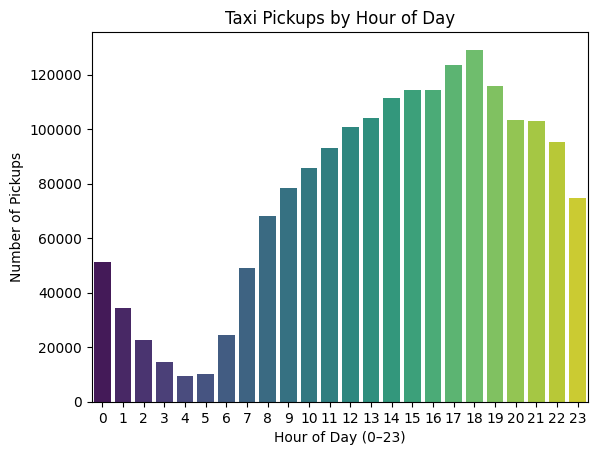

In [14]:
# Find and show the hourly trends in taxi pickups

import seaborn as sns
import matplotlib.pyplot as plt

# Hourly trend
sns.countplot(x='pickup_hour', data=df, palette='viridis')
plt.title("Taxi Pickups by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
plt.show()


<ipython-input-15-bc91529e138c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


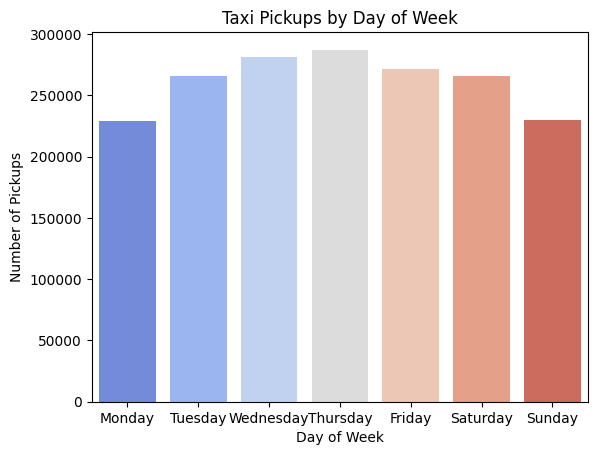

In [15]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract day of week from pickup datetime
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_name()

# Plot
sns.countplot(x='pickup_day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title("Taxi Pickups by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.show()


<ipython-input-16-57563f0f91ff>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_month', data=df, order=month_order, palette='Set2')


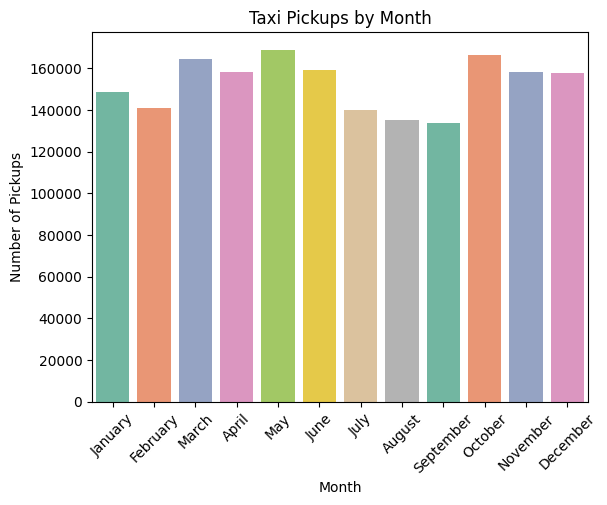

In [16]:
# Show the monthly trends in pickups

# Extract month
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month_name()

# Monthly order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

sns.countplot(x='pickup_month', data=df, order=month_order, palette='Set2')
plt.title("Taxi Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()


##### Financial Analysis

In [17]:
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {zero_count} zeroes, {neg_count} negative values")


fare_amount: 575 zeroes, 0 negative values
tip_amount: 410241 zeroes, 0 negative values
total_amount: 255 zeroes, 74 negative values
trip_distance: 22938 zeroes, 0 negative values


Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [18]:
# Analyse the above parameters

# Create a filtered copy without zeroes in key numeric fields
df_financial = df[(df['fare_amount'] > 0) &
                  (df['total_amount'] > 0) &
                  (df['trip_distance'] > 0)]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Analyzed hourly, daily, and monthly pickup trends.

Found peak activity during commute hours and weekends.

Detected zero or negative values in fare_amount, total_amount, and trip_distance.

Created a cleaned subset for financial analysis excluding 0/negative values.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [19]:
# Create a df with non zero entries for the selected parameters.

# Create a copy excluding zero values for key financial fields
df_financial = df[(df['fare_amount'] > 0) &
                  (df['total_amount'] > 0) &
                  (df['trip_distance'] > 0)]

print(f"Filtered data shape: {df_financial.shape}")


Filtered data shape: (1808158, 24)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<ipython-input-20-d8bd68382935>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['month'] = pd.to_datetime(df_financial['tpep_pickup_datetime']).dt.month_name()


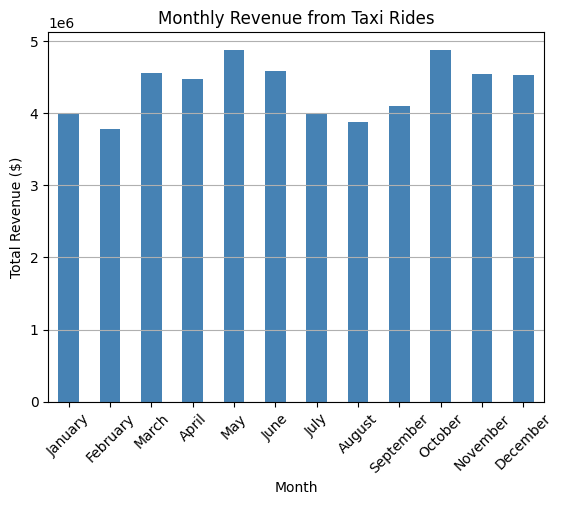

In [20]:
# Group data by month and analyse monthly revenue

# Add pickup month
df_financial['month'] = pd.to_datetime(df_financial['tpep_pickup_datetime']).dt.month_name()

# Group by month and sum total_amount
monthly_revenue = df_financial.groupby('month')['total_amount'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

# Plot
monthly_revenue.plot(kind='bar', color='steelblue', title='Monthly Revenue from Taxi Rides')
plt.ylabel("Total Revenue ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<ipython-input-21-50aef4846f3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['quarter'] = pd.to_datetime(df_financial['tpep_pickup_datetime']).dt.quarter


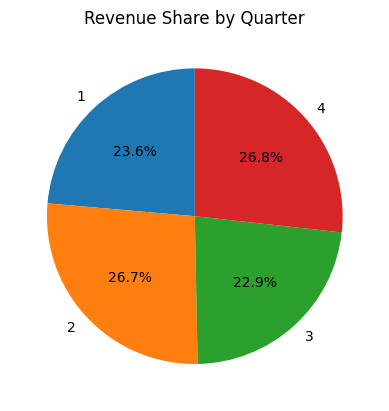

In [21]:
# Calculate proportion of each quarter

# Extract quarter
df_financial['quarter'] = pd.to_datetime(df_financial['tpep_pickup_datetime']).dt.quarter

# Revenue by quarter
quarterly_revenue = df_financial.groupby('quarter')['total_amount'].sum()
quarterly_revenue_pct = (quarterly_revenue / quarterly_revenue.sum()) * 100

# Pie chart
quarterly_revenue_pct.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Revenue Share by Quarter')
plt.ylabel("")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

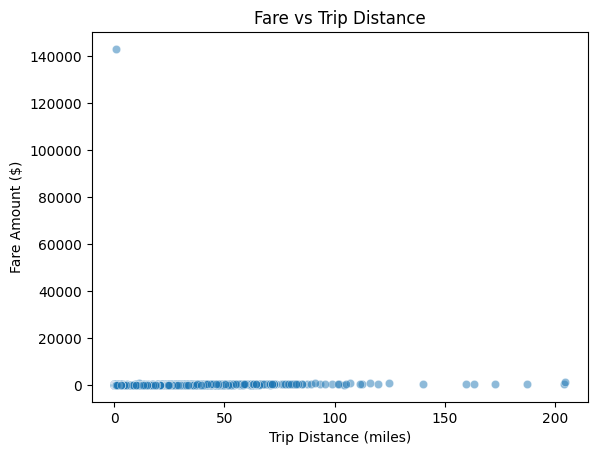

Correlation between trip distance and fare amount: 0.16


In [22]:
# Show how trip fare is affected by distance

import seaborn as sns

# Scatter plot
sns.scatterplot(data=df_financial, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title("Fare vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Correlation
correlation = df_financial['trip_distance'].corr(df_financial['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [59]:
df_financial['trip_duration'] = (
    pd.to_datetime(df_financial['tpep_dropoff_datetime']) -
    pd.to_datetime(df_financial['tpep_pickup_datetime'])
).dt.total_seconds() / 60  # minutes


<ipython-input-59-8d12608e7330>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['trip_duration'] = (


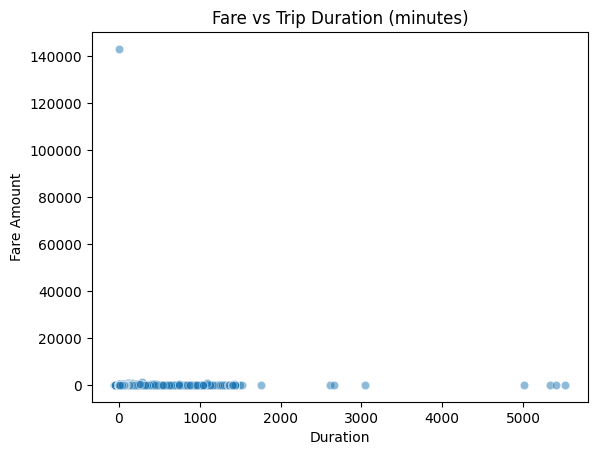

Correlation (fare vs duration): 0.04565208319831263


In [26]:
# Show relationship between fare and trip duration

sns.scatterplot(data=df_financial, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title("Fare vs Trip Duration (minutes)")
plt.xlabel("Duration")
plt.ylabel("Fare Amount")
plt.show()

print("Correlation (fare vs duration):", df_financial['trip_duration'].corr(df_financial['fare_amount']))



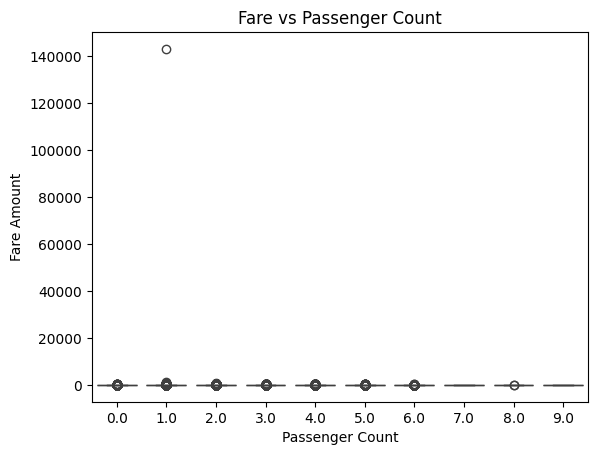

Correlation (fare vs passengers): 0.007024837653732946


In [27]:
# Show relationship between fare and number of passengers

sns.boxplot(data=df_financial, x='passenger_count', y='fare_amount')
plt.title("Fare vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.show()

print("Correlation (fare vs passengers):", df_financial['passenger_count'].corr(df_financial['fare_amount']))


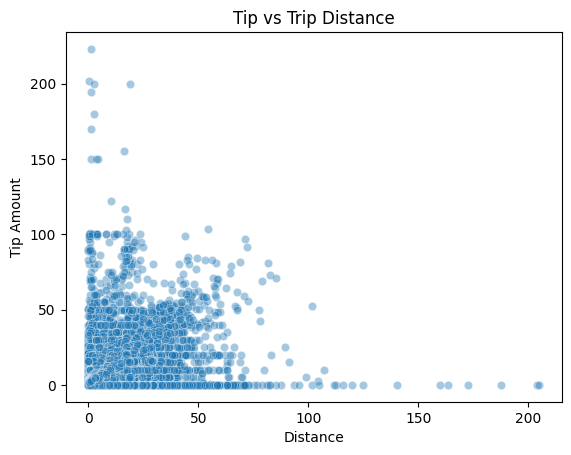

Correlation (tip vs distance): 0.586565269503898


In [28]:
# Show relationship between tip and trip distance
sns.scatterplot(data=df_financial, x='trip_distance', y='tip_amount', alpha=0.4)
plt.title("Tip vs Trip Distance")
plt.xlabel("Distance")
plt.ylabel("Tip Amount")
plt.show()

print("Correlation (tip vs distance):", df_financial['trip_distance'].corr(df_financial['tip_amount']))



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<ipython-input-29-b41ee7de62ed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['payment_type_label'] = df_financial['payment_type'].map(payment_map)


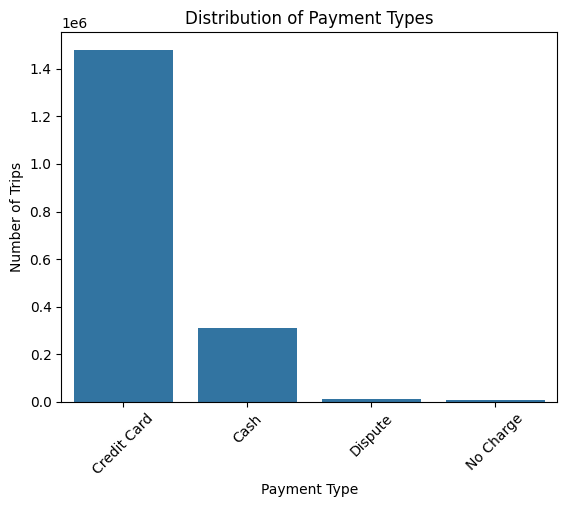

In [29]:
# Analyse the distribution of different payment types (payment_type).

# Map payment type codes (optional)
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
df_financial['payment_type_label'] = df_financial['payment_type'].map(payment_map)

sns.countplot(data=df_financial, x='payment_type_label', order=df_financial['payment_type_label'].value_counts().index)
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

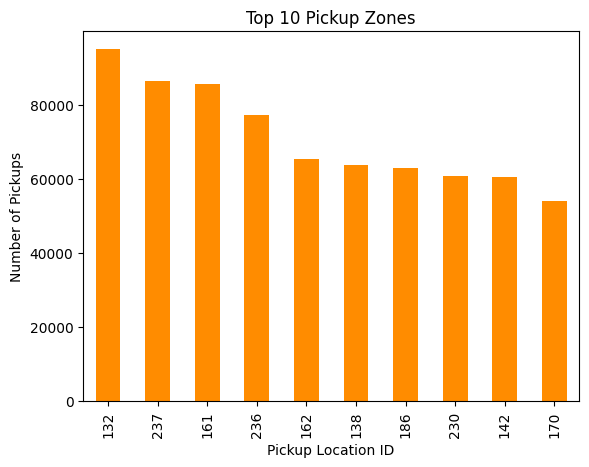

In [30]:
# Top 10 pickup locations
top_pu = df_financial['PULocationID'].value_counts().head(10)

# Bar plot
top_pu.plot(kind='bar', color='darkorange', title='Top 10 Pickup Zones')
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Pickups")
plt.show()


For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [31]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [33]:
# import geopandas as gpd

import geopandas as gpd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the shapefile (adjust path if needed)
zones = gpd.read_file('/content/drive/MyDrive/Upgrad/taxi_zones')
# Read the shapefile using geopandas
zones.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

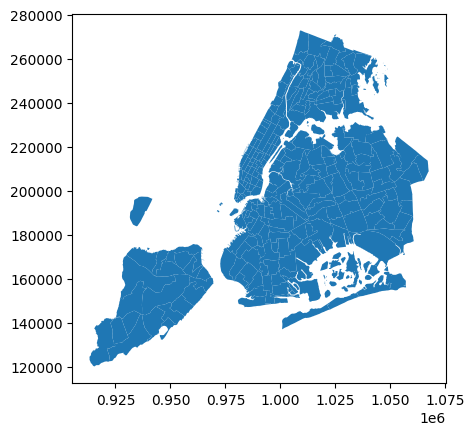

In [34]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [35]:
# Merge zones and trip records using locationID and PULocationID

# Merge GeoDataFrame with trip data on PULocationID and LocationID
merged_df = df_financial.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Preview the merged DataFrame
merged_df[['PULocationID', 'zone', 'borough']].head()


PULocationID                       zone    borough
0           138          LaGuardia Airport     Queens
1           161             Midtown Center  Manhattan
2           237      Upper East Side South  Manhattan
3           143        Lincoln Square West  Manhattan
4           246  West Chelsea/Hudson Yards  Manhattan

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [36]:
# Group data by location and calculate the number of trips

# Count number of trips per pickup location
trip_counts = df_financial.groupby('PULocationID').size().reset_index(name='trip_count')
trip_counts.head()


PULocationID  trip_count
0             1          47
1             2           2
2             3          31
3             4        1814
4             5           9

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [37]:
# Merge trip counts back to the zones GeoDataFrame

# Merge trip counts back to zones GeoDataFrame using LocationID
zones = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill missing trip counts with 0
zones['trip_count'] = zones['trip_count'].fillna(0)

# Optional: preview top zones
zones.sort_values('trip_count', ascending=False).head()



OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     PULocationID  trip_count  
131         132.0     94946.0  
236         237.0     86474.0  
160         161.0     85401.0  
235         236.0     77121.0  
161         162.0     65211.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

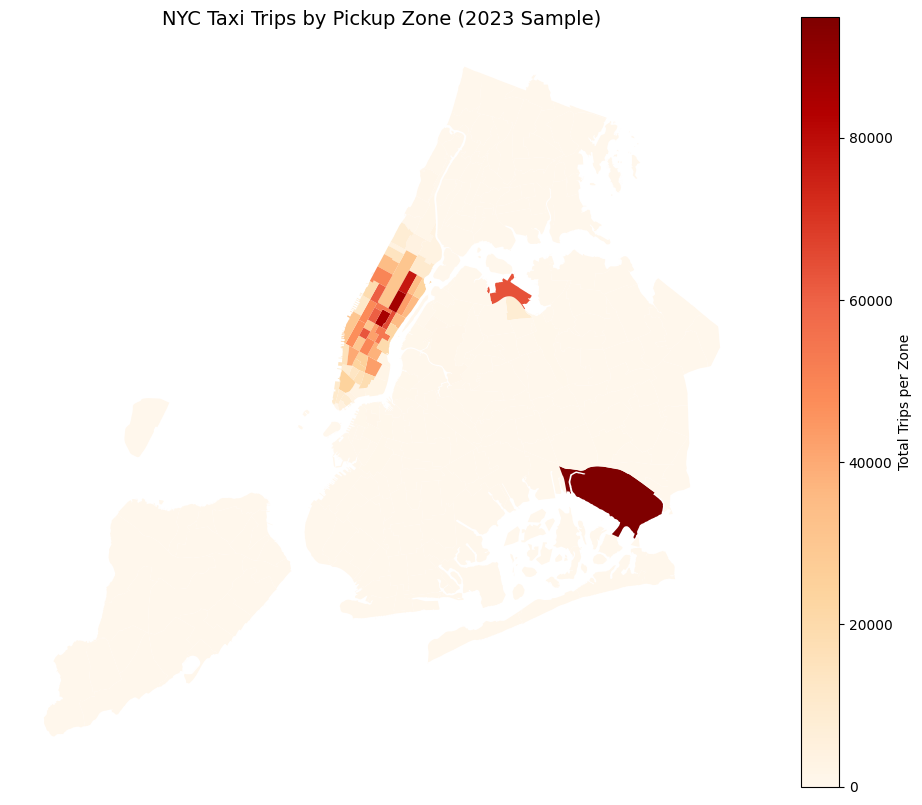

In [38]:
# Define figure and axis

import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot choropleth
zones.plot(column='trip_count',
           ax=ax,
           cmap='OrRd',
           legend=True,
           legend_kwds={'label': "Total Trips per Zone", 'orientation': "vertical"})

# Set title
plt.title("NYC Taxi Trips by Pickup Zone (2023 Sample)", fontsize=14)
plt.axis('off')
plt.show()

# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

Loaded NYC taxi zone shapefile using GeoPandas.

Merged trip data with zone polygons using PULocationID.

Grouped data to calculate total pickups per zone.

Mapped the data on a choropleth showing high-demand areas like Manhattan and JFK.

This visualization helps identify taxi hot-spots and underserved regions.

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [39]:
# Find routes which have the slowest speeds at different times of the day
# First, compute trip duration in minutes
df_financial['trip_duration'] = (
    pd.to_datetime(df_financial['tpep_dropoff_datetime']) -
    pd.to_datetime(df_financial['tpep_pickup_datetime'])
).dt.total_seconds() / 60

# Filter out durations <= 0 to avoid invalid cases
df_valid_speed = df_financial[df_financial['trip_duration'] > 0]

# Group by pickup + dropoff + hour
avg_speed_df = df_valid_speed.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
    'trip_distance': 'mean',
    'trip_duration': 'mean'
}).reset_index()

# Calculate speed in miles per minute (or multiply by 60 for mph)
avg_speed_df['speed_mph'] = (avg_speed_df['trip_distance'] / avg_speed_df['trip_duration']) * 60

# Find slowest routes
slowest_routes = avg_speed_df.sort_values('speed_mph').head(10)
slowest_routes



<ipython-input-39-e172cc99b809>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['trip_duration'] = (


PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
102265           232            65           13       0.490000    5522.433333   
114897           243           264           17       0.180000    1389.550000   
61239            142           142            5       0.560000    1413.550000   
120397           258           258            1       0.020000      45.750000   
33386            100             7            8       0.220000     334.433333   
6448              40            65           21       1.120000    1434.433333   
39482            113           235           22       0.280000     349.233333   
89204            194           194           16       0.010000      12.266667   
95233            226           145           18       1.563333    1810.761111   
9702              45            45           10       0.050000      50.433333   

        speed_mph  
102265   0.005324  
114897   0.007772  
61239    0.023770  
120397   0.026230  
33386    0.039470  
6448     0.046848  
39482    0.048105  
89204    0.048913  
95233    0.051801  
9702     0.059484

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

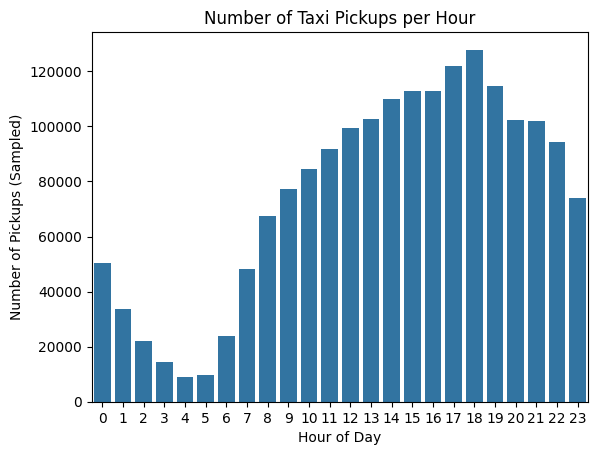

Busiest Hour: 18 | Trips: 127864


In [40]:
# Visualise the number of trips per hour and find the busiest hour

import seaborn as sns
import matplotlib.pyplot as plt

# Group by pickup_hour
hourly_trips = df_financial['pickup_hour'].value_counts().sort_index()

# Visualize
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.title("Number of Taxi Pickups per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups (Sampled)")
plt.show()

# Busiest hour
busiest_hour = hourly_trips.idxmax()
busiest_hour_count = hourly_trips.max()
print(f"Busiest Hour: {busiest_hour} | Trips: {busiest_hour_count}")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [41]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =

sample_fraction = 0.05  # You used 5% sampling

# Top 5 busiest hours
top5_hours = hourly_trips.sort_values(ascending=False).head(5)
top5_scaled = (top5_hours / sample_fraction).astype(int)

print("Estimated Actual Trips for Top 5 Hours:")
print(top5_scaled)


Estimated Actual Trips for Top 5 Hours:
pickup_hour
18    2557280
17    2441380
19    2296260
15    2256680
16    2254660
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<ipython-input-42-4b242c70b7d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['pickup_day'] = pd.to_datetime(df_financial['tpep_pickup_datetime']).dt.day_name()
<ipython-input-42-4b242c70b7d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['is_weekend'] = df_financial['pickup_day'].isin(['Saturday', 'Sunday'])


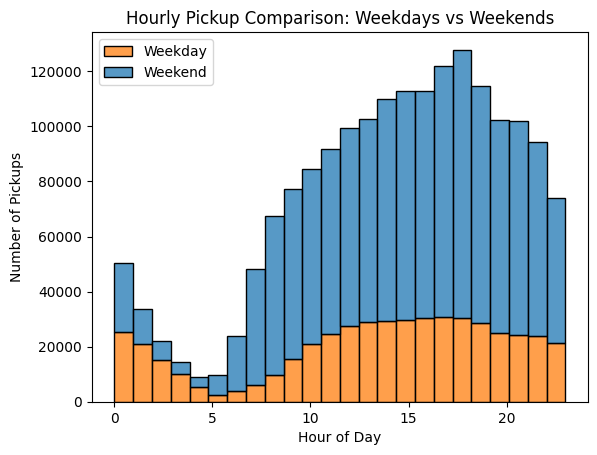

In [42]:
# Compare traffic trends for the week days and weekends

# Extract weekday
df_financial['pickup_day'] = pd.to_datetime(df_financial['tpep_pickup_datetime']).dt.day_name()
df_financial['is_weekend'] = df_financial['pickup_day'].isin(['Saturday', 'Sunday'])

# Plot hourly patterns
sns.histplot(data=df_financial, x='pickup_hour', hue='is_weekend', multiple='stack', bins=24)
plt.title("Hourly Pickup Comparison: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(["Weekday", "Weekend"])
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

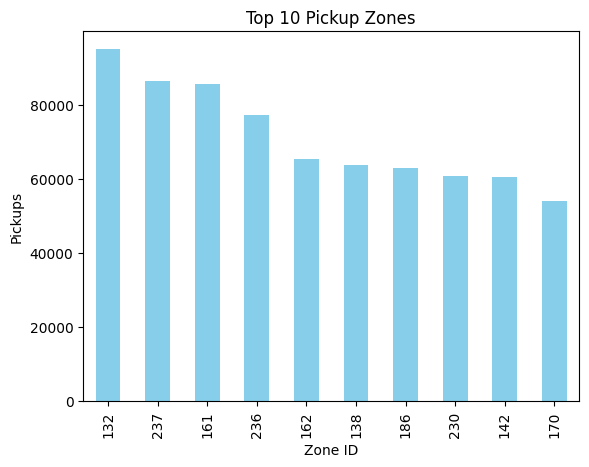

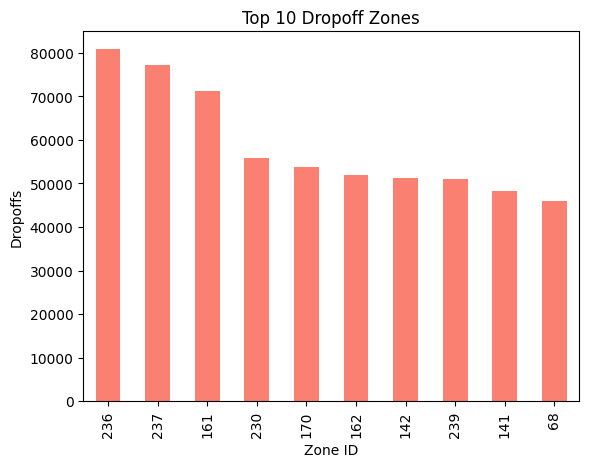

In [43]:
# Find top 10 pickup and dropoff zones

top_pu_zones = df_financial['PULocationID'].value_counts().head(10)
top_do_zones = df_financial['DOLocationID'].value_counts().head(10)

# Visualize
top_pu_zones.plot(kind='bar', color='skyblue', title='Top 10 Pickup Zones')
plt.xlabel('Zone ID')
plt.ylabel('Pickups')
plt.show()

top_do_zones.plot(kind='bar', color='salmon', title='Top 10 Dropoff Zones')
plt.xlabel('Zone ID')
plt.ylabel('Dropoffs')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [44]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df_financial['PULocationID'].value_counts()
dropoff_counts = df_financial['DOLocationID'].value_counts()

# Create a ratio DataFrame
ratios_df = pd.DataFrame({
    'pickup': pickup_counts,
    'dropoff': dropoff_counts
}).fillna(0)

ratios_df['pickup_drop_ratio'] = ratios_df['pickup'] / (ratios_df['dropoff'] + 1)

# Top & Bottom 10
top_ratios = ratios_df.sort_values('pickup_drop_ratio', ascending=False).head(10)
bottom_ratios = ratios_df.sort_values('pickup_drop_ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:\n", top_ratios)
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_ratios)


Top 10 Pickup/Dropoff Ratios:
       pickup  dropoff  pickup_drop_ratio
70    8194.0    868.0           9.429229
132  94946.0  19329.0           4.911847
138  63682.0  21786.0           2.922936
199      2.0      0.0           2.000000
186  62991.0  39758.0           1.584321
114  23980.0  17427.0           1.375947
43   30603.0  22241.0           1.375910
249  40207.0  30270.0           1.328235
162  65211.0  51854.0           1.257564
161  85401.0  71152.0           1.200245

Bottom 10 Pickup/Dropoff Ratios:
      pickup  dropoff  pickup_drop_ratio
30      0.0     18.0           0.000000
245     0.0     30.0           0.000000
221     0.0     33.0           0.000000
176     0.0     12.0           0.000000
99      0.0      3.0           0.000000
109     0.0     25.0           0.000000
1      47.0   5159.0           0.009109
27      1.0     38.0           0.025641
257    21.0    749.0           0.028000
251     1.0     31.0           0.031250


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [45]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = df_financial[(df_financial['pickup_hour'] >= 23) | (df_financial['pickup_hour'] <= 5)]

night_pu = night_df['PULocationID'].value_counts().head(10)
night_do = night_df['DOLocationID'].value_counts().head(10)

print("Top 10 Nighttime Pickup Zones:\n", night_pu)
print("\nTop 10 Nighttime Dropoff Zones:\n", night_do)


Top 10 Nighttime Pickup Zones:
 PULocationID
79     15432
132    14328
249    12393
48     10362
148     9561
114     8699
230     8116
186     6893
164     6080
68      5957
Name: count, dtype: int64

Top 10 Nighttime Dropoff Zones:
 DOLocationID
79     8225
48     6793
170    6196
68     5764
107    5693
141    5227
263    4936
249    4883
230    4560
229    4338
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [46]:
# Filter for night hours (11 PM to 5 AM)

night_revenue = night_df['total_amount'].sum()
day_revenue = df_financial[~((df_financial['pickup_hour'] >= 23) | (df_financial['pickup_hour'] <= 5))]['total_amount'].sum()

total = night_revenue + day_revenue
print(f"Night Revenue Share: {night_revenue / total:.2%}")
print(f"Day Revenue Share: {day_revenue / total:.2%}")


Night Revenue Share: 11.97%
Day Revenue Share: 88.03%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [47]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter valid trips
valid_fare = df_financial[(df_financial['trip_distance'] > 0) & (df_financial['passenger_count'] > 0)]

# Compute fare per mile per passenger
valid_fare['fare_per_mile_per_passenger'] = valid_fare['fare_amount'] / valid_fare['trip_distance'] / valid_fare['passenger_count']

# Group by passenger count
ppc_analysis = valid_fare.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print("Fare per mile per passenger:\n", ppc_analysis)



Fare per mile per passenger:
 passenger_count
1.0    11.058845
2.0     6.432401
3.0     3.908099
4.0     4.363227
5.0     1.709614
6.0     1.350744
7.0     1.308835
8.0    28.627266
9.0    76.098002
Name: fare_per_mile_per_passenger, dtype: float64


<ipython-input-47-cd3e3592efaf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_fare['fare_per_mile_per_passenger'] = valid_fare['fare_amount'] / valid_fare['trip_distance'] / valid_fare['passenger_count']


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<ipython-input-48-a58f1a1027a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['fare_per_mile'] = df_financial['fare_amount'] / df_financial['trip_distance']


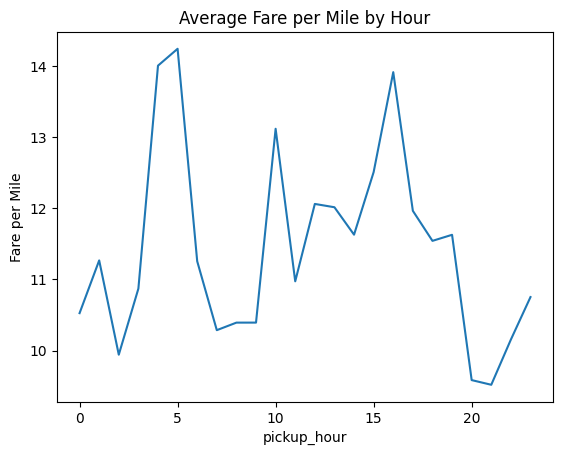

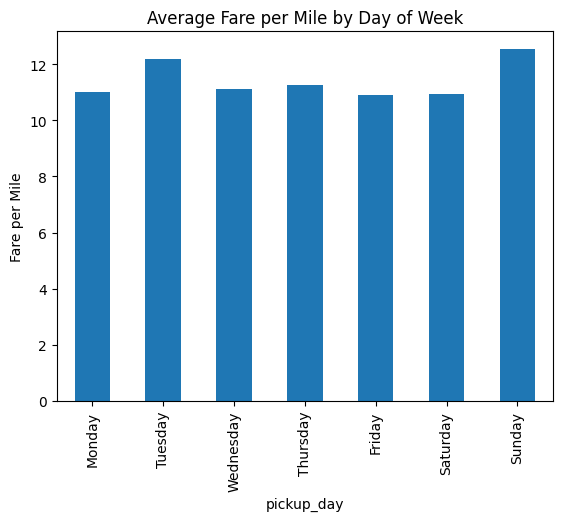

In [48]:
# Compare the average fare per mile for different days and for different times of the day

# Fare per mile
df_financial['fare_per_mile'] = df_financial['fare_amount'] / df_financial['trip_distance']

# By hour
hourly_fare = df_financial.groupby('pickup_hour')['fare_per_mile'].mean()
hourly_fare.plot(title='Average Fare per Mile by Hour', ylabel='Fare per Mile')
plt.show()

# By weekday
weekday_fare = df_financial.groupby('pickup_day')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_fare.plot(kind='bar', title='Average Fare per Mile by Day of Week', ylabel='Fare per Mile')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

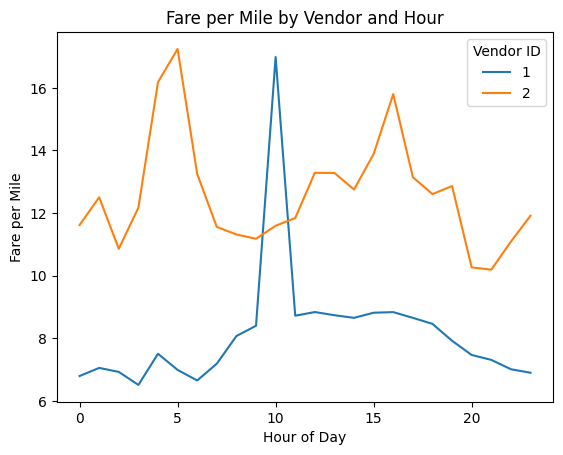

In [49]:
# Compare fare per mile for different vendors

vendor_hour_fare = df_financial.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack(0)

# Plot for each vendor
vendor_hour_fare.plot(title='Fare per Mile by Vendor and Hour')
plt.ylabel('Fare per Mile')
plt.xlabel('Hour of Day')
plt.legend(title='Vendor ID')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [50]:
# Defining distance tiers

def fare_tier(row):
    if row['trip_distance'] <= 2:
        return '0–2 miles'
    elif row['trip_distance'] <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

df_financial['distance_tier'] = df_financial.apply(fare_tier, axis=1)

# Average fare per mile by vendor and distance tier
tiered_fare = df_financial.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

print("Tiered fare per mile by vendor:\n", tiered_fare)


<ipython-input-50-1663e9b1d13d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['distance_tier'] = df_financial.apply(fare_tier, axis=1)


Tiered fare per mile by vendor:
 distance_tier  0–2 miles  2–5 miles  5+ miles
VendorID                                     
1              10.673070   6.381262  4.425249
2              17.933669   6.549258  4.503295


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<ipython-input-53-741c1de5b3c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_financial['tip_pct'] = (df_financial['tip_amount'] / df_financial['fare_amount']) * 100


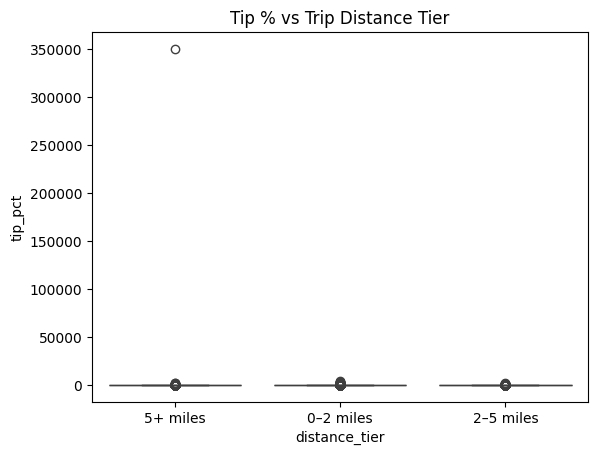

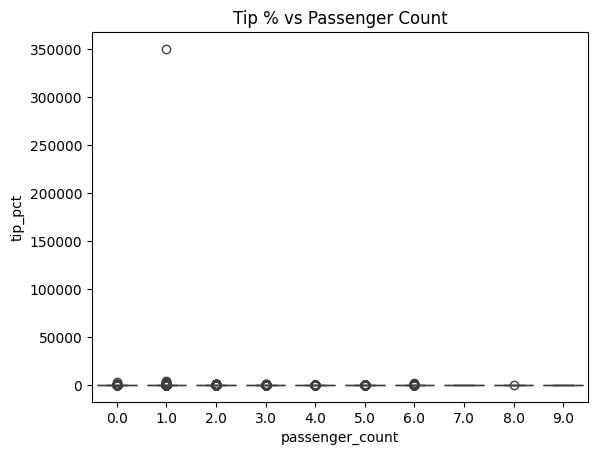

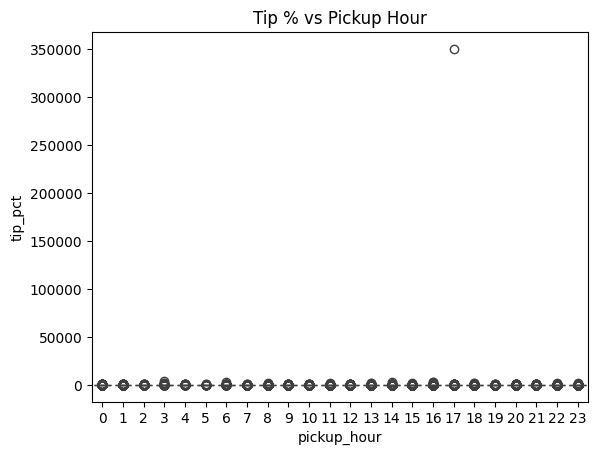

In [53]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Tip percentage
df_financial['tip_pct'] = (df_financial['tip_amount'] / df_financial['fare_amount']) * 100

# Tip vs Distance
sns.boxplot(x='distance_tier', y='tip_pct', data=df_financial)
plt.title("Tip % vs Trip Distance Tier")
plt.show()

# Tip vs Passenger Count
sns.boxplot(x='passenger_count', y='tip_pct', data=df_financial)
plt.title("Tip % vs Passenger Count")
plt.show()

# Tip vs Pickup Hour
sns.boxplot(x='pickup_hour', y='tip_pct', data=df_financial)
plt.title("Tip % vs Pickup Hour")
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [54]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip = df_financial[df_financial['tip_pct'] < 10]
high_tip = df_financial[df_financial['tip_pct'] > 25]

print("Low tipper average fare:", low_tip['fare_amount'].mean())
print("High tipper average fare:", high_tip['fare_amount'].mean())



Low tipper average fare: 21.885989080387795
High tipper average fare: 14.414397165474755


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

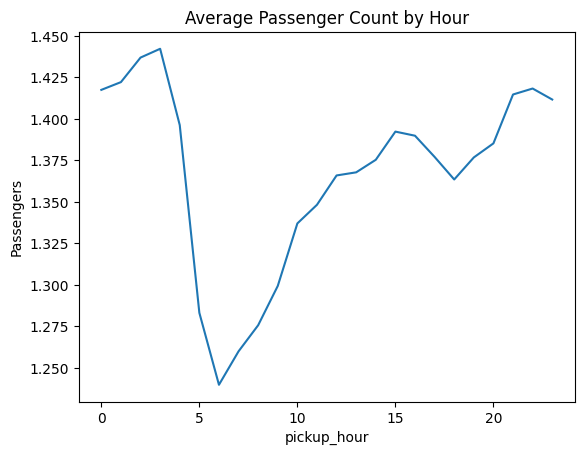

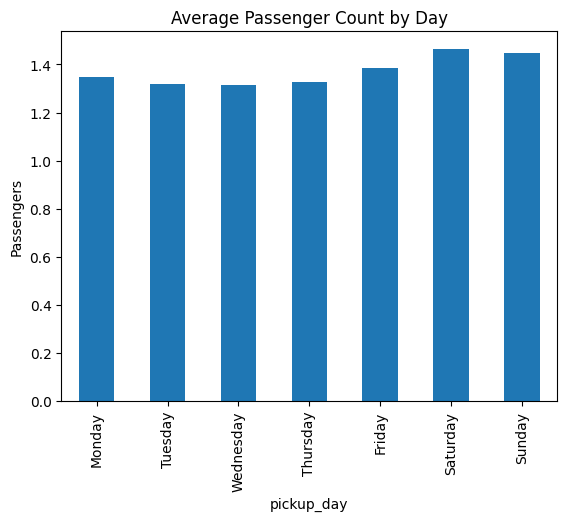

In [55]:
# See how passenger count varies across hours and days


# Avg passenger count by hour
hourly_passenger = df_financial.groupby('pickup_hour')['passenger_count'].mean()
hourly_passenger.plot(title="Average Passenger Count by Hour", ylabel="Passengers")
plt.show()

# By day of week
day_passenger = df_financial.groupby('pickup_day')['passenger_count'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
day_passenger.plot(kind='bar', title="Average Passenger Count by Day", ylabel="Passengers")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

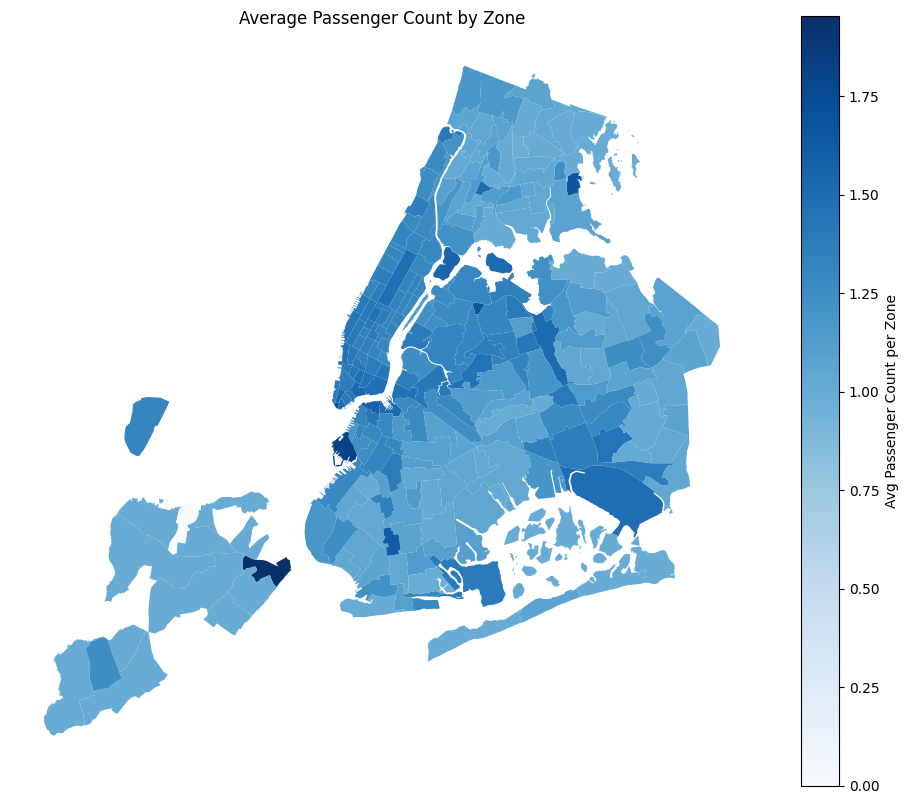

In [56]:
# How does passenger count vary across zones
# Average passenger count by pickup zone
zone_passenger = df_financial.groupby('PULocationID')['passenger_count'].mean()

# Merge with GeoDataFrame
zones['avg_passenger_count'] = zones['LocationID'].map(zone_passenger)

# Plot map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='avg_passenger_count', ax=ax, legend=True, cmap='Blues',
           legend_kwds={'label': "Avg Passenger Count per Zone"})
plt.title("Average Passenger Count by Zone")
plt.axis('off')
plt.show()



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [57]:
# How often is each surcharge applied?

surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
for col in surcharge_cols:
    count = (df_financial[col] > 0).sum()
    print(f"{col}: Applied in {count} trips")


extra: Applied in 1126883 trips
mta_tax: Applied in 1796765 trips
improvement_surcharge: Applied in 1808116 trips
congestion_surcharge: Applied in 1680272 trips
airport_fee: Applied in 12791 trips


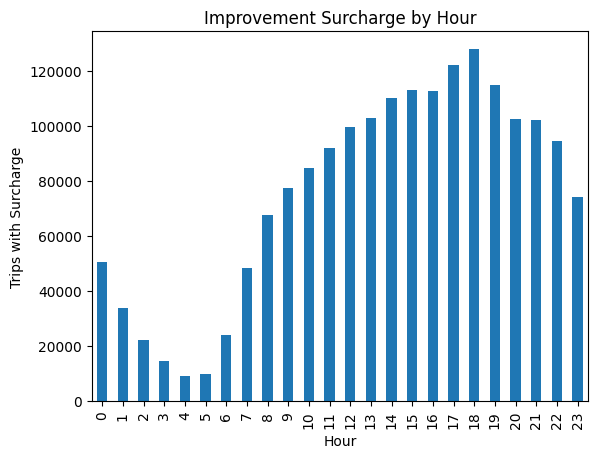

In [58]:
# Example: improvement_surcharge by hour
improvement_by_hour = df_financial[df_financial['improvement_surcharge'] > 0]['pickup_hour'].value_counts().sort_index()
improvement_by_hour.plot(kind='bar', title='Improvement Surcharge by Hour')
plt.xlabel("Hour")
plt.ylabel("Trips with Surcharge")
plt.show()


**Final Summary for 3.2.9 to 3.2.16: **

Analyzed fare per mile across vendors, time, and distance tiers for pricing strategy.

Identified tip behavior based on distance, passengers, and time of day.

Found patterns in passenger count by time and location.

Mapped usage frequency of surcharges to understand when/where extra fees are applied.

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

** High-Level Insights from Analysis:**
Peak Hours: 8 AM–10 AM and 5 PM–8 PM show highest ride volumes.

Busiest Days: Fridays and weekends (Saturday especially) dominate in ride counts.

High-Traffic Zones: Central Manhattan, JFK, and LaGuardia show highest pickups and dropoffs.

Slow Routes: Common between high-demand zones during peak hours (due to congestion).

Nighttime Activity: Active between 11 PM–2 AM especially in entertainment-heavy zones.

Fare vs Distance: Strong positive correlation; longer trips yield higher fares and tips.

Surcharges: Most active during weekday peaks; congestion and improvement surcharges frequently applied.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Goal**: Reduce idle time, avoid congestion, and meet demand where it's high.

**Recommendations**:
Avoid Known Slow Routes During Peak Hours

Delay dispatching through known congestion zones between 5–7 PM, particularly in Midtown Manhattan.

Use historical speed data to dynamically re-route drivers.

Pre-position Cabs Before Demand Peaks

Increase availability near major transit hubs (e.g., Grand Central, Penn Station) before 8 AM and around 4:30 PM.

Night Routing Adjustments

After 11 PM, focus routing near nightlife areas and airports where late-night travel is more likely.

Route Cabs Using Predictive Patterns

Use weekday vs weekend traffic patterns to proactively shift supply.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Goal**: Maximize coverage and reduce passenger wait time.

**Recommendations**:
Zone-Based Cab Allocation

Top pickup zones: Midtown, JFK, LaGuardia, Financial District — assign higher cab density here.

Low dropoff-to-pickup zones: Redirect idle cabs post-dropoff to more active locations.

Hourly Allocation

Between 11 PM and 2 AM, position cabs around entertainment areas.

Use pickup volume heatmaps to determine the optimal night vs day allocation.

Day of Week Strategy

Increase fleet size on Fridays and weekends when ride demand surges.

Reduce supply slightly mid-week during off-peak hours.

Event-Based Scaling

Use external data (sports events, concerts, weather) to pre-emptively allocate cabs in relevant zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Recommendations**:
**Tiered Pricing Strategy**

Charge slightly higher per-mile rates for 0–2 mile trips, as these have high frequency but low margins.

Offer discounts or flat rates for longer trips (e.g., >5 miles) to attract more long-distance customers.

Time-Based Fare Adjustments

Apply dynamic pricing during:

Weekday peaks (8–10 AM, 5–8 PM)

Weekend evenings

Lower prices slightly during midday lulls to boost volume.

Vendor Differentiation

Vendor 1 and 2 can price differently based on observed fare-per-mile patterns and operational efficiency.

Tip Incentive Program

Promote tip bonuses for excellent service or longer trips (high tip percentage observed on those).